In [44]:
import pandas as pd
df =  pd.read_csv("loan_approval_dataset.csv",skipinitialspace=True)

In [45]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [47]:
df["loan_status"]

0       Approved
1       Rejected
2       Rejected
3       Rejected
4       Rejected
          ...   
4264    Rejected
4265    Approved
4266    Rejected
4267    Approved
4268    Approved
Name: loan_status, Length: 4269, dtype: object

In [48]:
df["loan_status"].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [49]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [50]:
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

In [51]:
# onehot encoding

df2 = pd.get_dummies(df,drop_first='if_binary').astype(int)
df2

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0,0


In [52]:
x = df2.drop(['loan_status_Rejected','loan_id'], axis='columns')
y = df2[['loan_status_Rejected']]

In [53]:
x

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0


In [54]:
y.head()

,loan_status_Rejected
0,0
1,1
2,1
3,1
4,1


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
std_scaler = StandardScaler()
x_transformed = std_scaler.fit_transform(x)

In [57]:
x_transformed.shape, x.shape

((4269, 11), (4269, 11))

In [58]:
# train test split

from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.20)


In [60]:
from tensorflow.keras.models import Sequential

In [61]:
from tensorflow.keras.layers import Dense

In [62]:
x_train.shape

(3415, 11)

In [63]:
# ANN(Artificial Neural Network Defining
ANN_model = Sequential()
ANN_model.add(Dense(units=64,activation='relu',input_dim=11))  # hidden layer 1st with input layer
ANN_model.add(Dense(units=32,activation='relu'))  # HIDDEN LAYER 2
ANN_model.add(Dense(units=16,activation='relu'))   # HIDDEN LAYER 3

ANN_model.add(Dense(units=1,activation='sigmoid'))  # OUTPUT LAYER
ANN_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
ANN_model.summary()

C:\Users\lalch\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history = ANN_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7052 - loss: 0.5588 - val_accuracy: 0.9133 - val_loss: 0.2507
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9165 - loss: 0.2258 - val_accuracy: 0.9274 - val_loss: 0.1906
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9334 - loss: 0.1787 - val_accuracy: 0.9391 - val_loss: 0.1695
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9415 - loss: 0.1644 - val_accuracy: 0.9461 - val_loss: 0.1561
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9479 - loss: 0.1373 - val_accuracy: 0.9496 - val_loss: 0.1481
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9582 - loss: 0.1200 - val_accuracy: 0.9496 - val_loss: 0.1455
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9595 - loss: 0.1280 - val_accuracy: 0.9590 - val_loss: 0.1353
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9640 - loss: 0.1073 - val_accuracy: 0.

In [65]:
pd.DataFrame(x_train,columns=x.columns).head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,-0.883825,-0.127961,0.095833,0.542970,-1.124853,-0.534013,0.074478,-0.090776,-0.515936,1.004461,0.992765
1,0.295621,0.335248,0.095833,0.192617,0.035172,-0.749302,1.510064,0.458512,0.868762,1.004461,0.992765
2,1.475067,1.404190,0.317015,1.243677,-0.527440,2.633817,0.051691,0.535413,0.345654,-0.995559,-1.007288
3,-0.883825,-1.125641,-0.888430,-1.559151,1.357599,-0.549390,-0.609134,-1.024566,-1.100587,1.004461,-1.007288
4,1.475067,0.228353,-0.258059,0.542970,-0.649243,0.942258,-0.905366,-0.211619,0.161027,-0.995559,0.992765


In [66]:
pd.DataFrame(x_train,columns=x.columns).isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
education_Not Graduate      0
self_employed_Yes           0
dtype: int64

In [67]:
x_train.shape , y_train.shape

((3415, 11), (3415, 1))

In [68]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.804685,0.437194,0.913349,0.250712
1,0.921523,0.212934,0.927400,0.190647
2,0.938799,0.176208,0.939110,0.169510
3,0.944949,0.151614,0.946136,0.156052
4,0.947877,0.136600,0.949649,0.148096
5,0.958712,0.121312,0.949649,0.145546
6,0.958712,0.114171,0.959016,0.135309
7,0.963104,0.105873,0.951991,0.130526
8,0.968375,0.095231,0.960187,0.124123
9,0.971010,0.090025,0.954333,0.123126


In [69]:
# Prediction

prediction = ANN_model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [70]:
prediction

array([[1.43432871e-07],
       [2.96580470e-06],
       [8.64325941e-01],
       [6.11802854e-04],
       [9.99990165e-01],
       [3.86672673e-06],
       [1.59733041e-04],
       [6.59767509e-01],
       [1.00459092e-05],
       [4.28549356e-06],
       [6.81061123e-04],
       [9.04483528e-08],
       [8.96062335e-09],
       [9.40098763e-01],
       [8.12148213e-01],
       [2.20632479e-01],
       [2.29812488e-02],
       [1.51441083e-03],
       [7.33829737e-01],
       [9.89304070e-08],
       [6.57025427e-02],
       [9.98800814e-01],
       [2.51659512e-04],
       [9.99938011e-01],
       [4.95416105e-01],
       [6.41919017e-01],
       [2.33861998e-01],
       [9.99941885e-01],
       [6.08837922e-07],
       [9.90466475e-01],
       [9.43580806e-01],
       [7.06333518e-01],
       [5.39439770e-06],
       [8.77113581e-01],
       [9.99839246e-01],
       [6.29425858e-06],
       [1.18986415e-02],
       [2.86353588e-06],
       [8.72769451e-04],
       [9.99768674e-01],


In [71]:
prediction>0.5

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [

In [72]:
(prediction>0.5).astype(int)   # in 1D

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [73]:
pred = (prediction>0.5).astype(int).ravel()

In [74]:
y_test['prediction'] = pred 

In [75]:
y_test

,loan_status_Rejected,prediction
3142,0,0
2053,0,0
483,1,1
3696,0,0
1116,1,1
...,...,...
2060,0,0
1751,0,0
3076,1,1
4174,0,0


In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
matrix = confusion_matrix(y_test['loan_status_Rejected'],y_test['prediction'])
matrix

array([[514,  19],
       [ 20, 301]], dtype=int64)

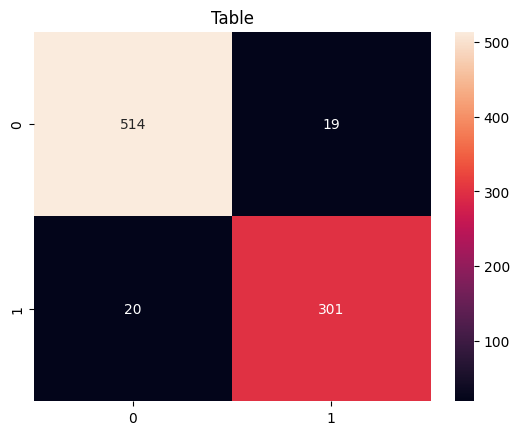

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.heatmap(matrix,annot=True,fmt='d')
plt.title("Table")
plt.show()

In [79]:
print(classification_report(y_test['loan_status_Rejected'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       533
           1       0.94      0.94      0.94       321

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



In [80]:
#  model save

import os ,joblib
os.makedirs('models',exist_ok=True)
ANN_model.save('./models/loan_approval.h5')
joblib.dump(std_scaler,'./models/std_scaler.lb')

['./models/std_scaler.lb']

In [81]:
std_scaler

StandardScaler()

In [82]:
from tensorflow.keras.models import load_model

In [83]:
ann_model_loaded = load_model('./models/loan_approval.h5')

In [84]:
ann_model_loaded.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,395 (13.27 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [85]:
print(x.columns)

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_Not Graduate',
       'self_employed_Yes'],
      dtype='object')


In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

# Load and preprocess the dataset
df = pd.read_csv("loan_approval_dataset.csv", skipinitialspace=True)
df2 = pd.get_dummies(df, drop_first='if_binary').astype(int)

x = df2.drop(['loan_status_Rejected', 'loan_id'], axis='columns')
y = df2[['loan_status_Rejected']]

# Standardize the data
std_scaler = StandardScaler()
x_transformed = std_scaler.fit_transform(x)

# Save the scaler
joblib.dump(std_scaler, './models/std_scaler.lb')

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.20)

# Define the ANN model
ANN_model = Sequential()
ANN_model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))  # input_dim is the number of features
ANN_model.add(Dense(units=32, activation='relu'))
ANN_model.add(Dense(units=16, activation='relu'))
ANN_model.add(Dense(units=1, activation='sigmoid'))

ANN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = ANN_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Save the model
ANN_model.save('./models/loan_approval.h5')

# Print model summary
ANN_model.summary()


C:\Users\lalch\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7100 - loss: 0.5770 - val_accuracy: 0.9204 - val_loss: 0.2437
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9231 - loss: 0.2296 - val_accuracy: 0.9286 - val_loss: 0.1910
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9403 - loss: 0.1754 - val_accuracy: 0.9309 - val_loss: 0.1689
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9323 - loss: 0.1758 - val_accuracy: 0.9379 - val_loss: 0.1581
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9403 - loss: 0.1663 - val_accuracy: 0.9426 - val_loss: 0.1490
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9496 - loss: 0.1394 - val_accuracy: 0.9438 - val_loss: 0.1328
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9518 - loss: 0.1396 - val_accuracy: 0.9450 - val_loss: 0.1323
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9519 - loss: 0.1329 - val_accuracy: 0.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

In [87]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Display information about the dataset
print(df.info())

# Display column names
print(df.columns)


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

# Load the dataset
url = 'https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Display information about the dataset
print(df.info())

# One-hot encoding of categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df_encoded.drop(['loan_status_Rejected', 'loan_id'], axis=1)
y = df_encoded['loan_status_Rejected']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Save the scaler
os.makedirs('models', exist_ok=True)
joblib.dump(scaler, './models/std_scaler.lb')


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

KeyError: "['loan_status_Rejected'] not found in axis"

In [89]:
# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Save the model
model.save('./models/loan_approval.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


NameError: name 'X_train' is not defined